In [ ]:
# NN을 목전에 두고 gradient method 를 가지고 linear regression 이랑 logistic regression 을 해볼 것

In [5]:
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.random.rand(100)*np.pi*2   # 학습 data
Y = np.zeros(len(X))
Y[np.sin(X) > 0] = 1

In [5]:
nX = np.c_[np.ones(len(X)), X]  # XW (X0=1)

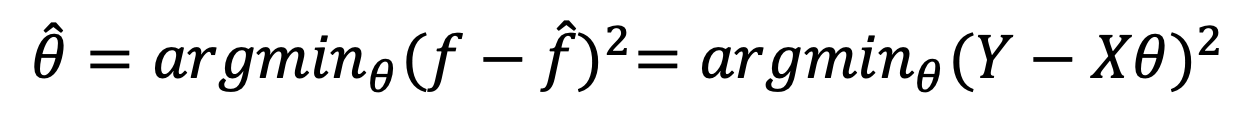

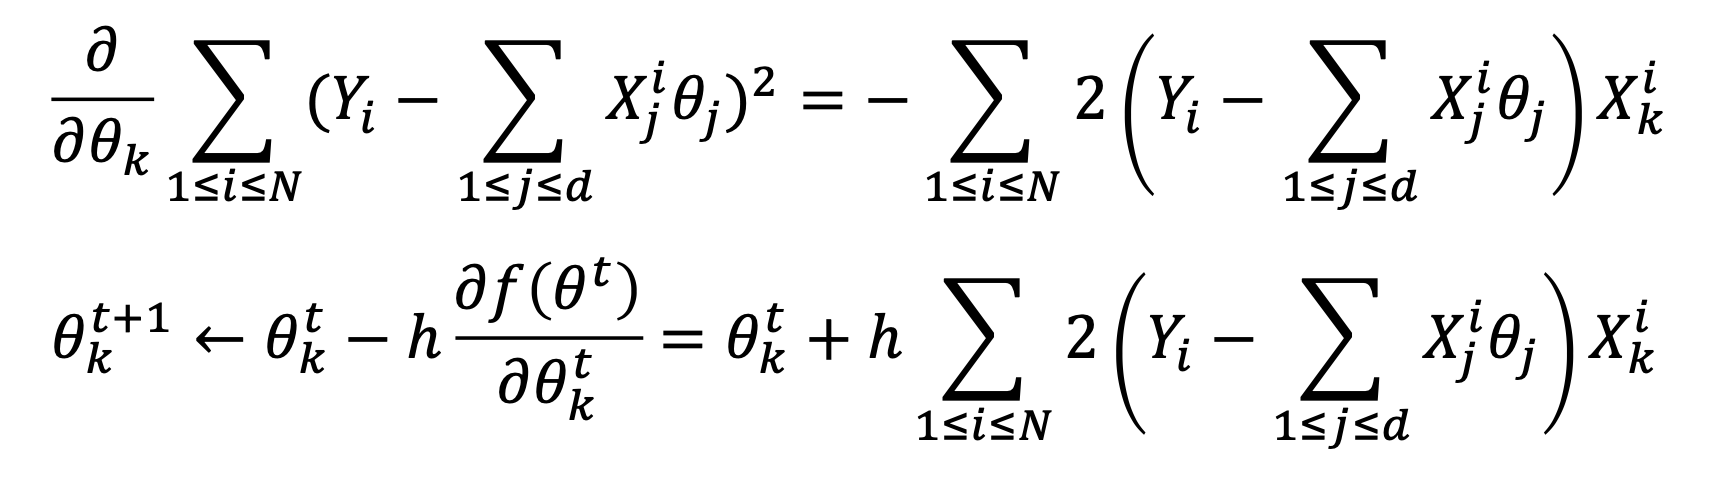

In [8]:
# Linear Regression with Gradient Ascent
linear = lambda x,w:x.dot(w)
#                   (2,) (2,) = 1
dlinear = lambda x,y:x.dot(y)
#                   (2,) (1,) = (2,)

# instance 1개에 대한 목적함수(J). 이것을 미분 취한게 cost func 혹은 Loss
SE = lambda y,x,w:np.power(y-linear(x,w), 2)
#                         (1,)  (1,) = (1,)

# 전체 instance 평균
MSE = lambda y,x,w:np.mean(SE(y,x,w))
loss = lambda y,x,w:dlinear(x, -2*(y-linear(x,w)))
#                          (2,)  (1,)  (1,) = (2,)

In [25]:
# W 가 세타, h는 작은값
W = np.random.rand(2)
h = 1e-5
history = list()

for _ in range(10000):
    for x,y in zip(nX,Y):  # NN 관점에서 보면 Extreame case - Mini-batch(batch size 1)
        yhat = linear(x,W)
        u = loss(y,x,W)
        u = u/np.linalg.norm(u)  # 길이로 정규화 -> 유닛벡터
        W -= h*u
        
    if _ % 100 == 0:
        history.append(MSE(Y,nX,W))

In [26]:
np.linalg.inv(nX.T.dot(nX)).dot(nX.T).dot(Y), W

(array([ 1.25303242, -0.24698193]), array([ 1.15162286, -0.20921881]))

0.06089763471139201

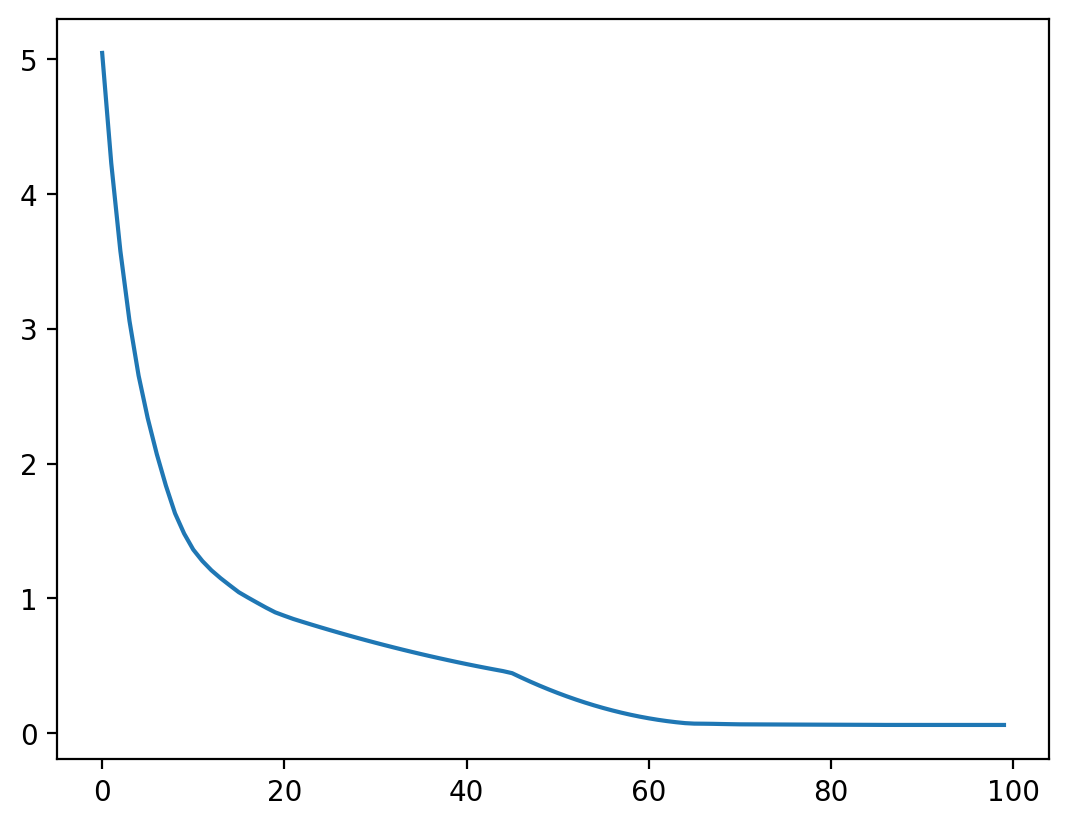

In [27]:
plt.plot(history)
history[-1]

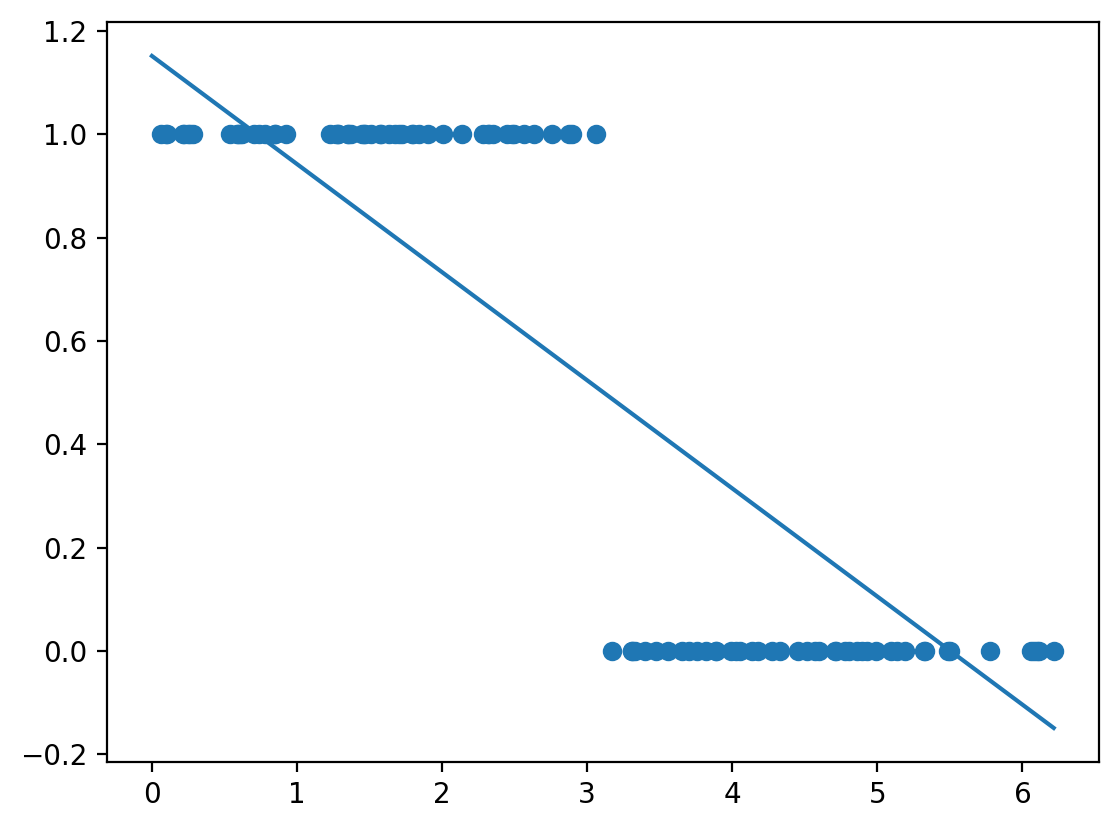

In [29]:
plt.scatter(X, Y)
plt.plot([0, np.max(X)],
         [np.dot(np.array([1,0]), W),
          np.dot(np.array([1,np.max(X)]),W)])

In [30]:
# W 가 세타, h는 작은값
W = np.random.rand(2)
h = 1e-5
history = list()

for _ in range(10000):
    for x,y in zip(nX,Y):  # NN 관점에서 보면 Extreame case - Mini-batch(batch size 1)
        yhat = linear(x,W)
        u = loss(y,x,W)
        u = u#/np.linalg.norm(u)  # 길이로 정규화 -> 유닛벡터
        W -= h*u
    # Full-batch, h 가 작은 수라면 상수 C 로 나눌 필요 없다!
    
    if _ % 100 == 0:
        history.append(MSE(Y,nX,W))

In [31]:
np.linalg.inv(nX.T.dot(nX)).dot(nX.T).dot(Y), W

(array([ 1.25303242, -0.24698193]), array([ 1.25031145, -0.2462172 ]))

0.05638275427932227

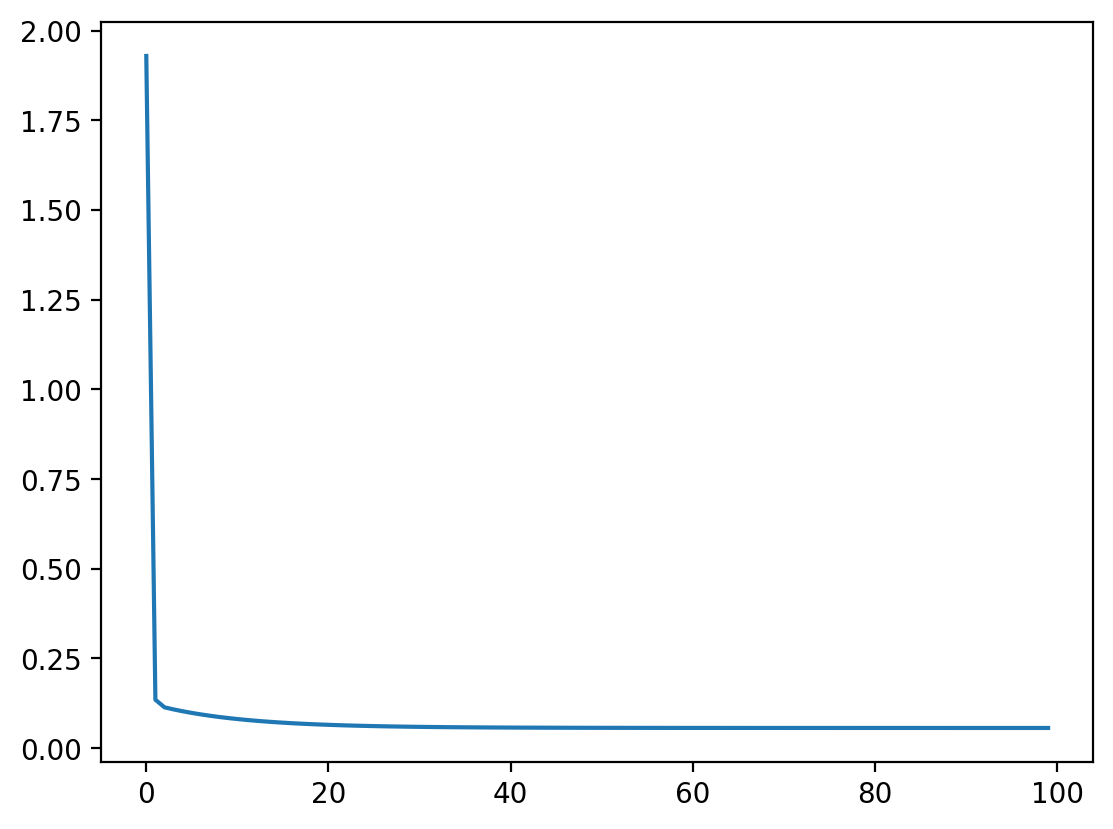

In [32]:
plt.plot(history)
history[-1]

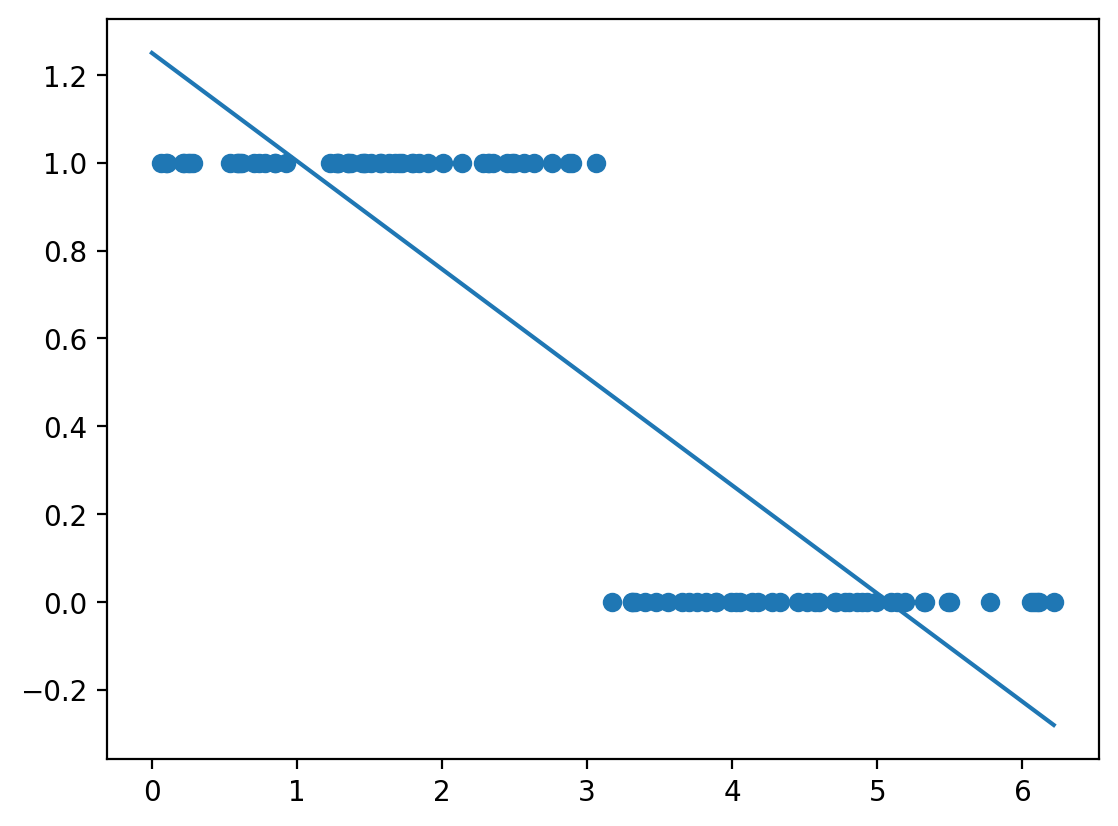

In [33]:
plt.scatter(X, Y)
plt.plot([0, np.max(X)],
         [np.dot(np.array([1,0]), W),
          np.dot(np.array([1,np.max(X)]),W)])

In [34]:
# Linear Regression with Gradient Ascent
linear = lambda x,w:x.dot(w)
#                   (2,) (2,) = 1
dlinear = lambda x,y:x.T.dot(y)  # (d, w차원수) => (w차원수, d)
#                   (2,) (1,) = (2,)

# instance 1개에 대한 목적함수(J). 이것을 미분 취한게 cost func 혹은 Loss
SE = lambda y,x,w:np.power(y-linear(x,w), 2)
#                         (1,)  (1,) = (1,)

# 전체 instance 평균
MSE = lambda y,x,w:np.mean(SE(y,x,w))
loss = lambda y,x,w:dlinear(x, -2*(y-linear(x,w)))
#                          (2,)  (1,)  (1,) = (2,)

In [38]:
# W 가 세타, h는 작은값
W = np.random.rand(2)
h = 1e-5
history = list()

for _ in range(10000):
#     for x,y in zip(nX,Y):  # NN 관점에서 보면 Extreame case - Mini-batch(batch size 1)
#         yhat = linear(x,W)
#         u = loss(y,x,W)
#         u = u#/np.linalg.norm(u)  # 길이로 정규화 -> 유닛벡터
#         W -= h*u

    # Full-batch, h 가 작은 수라면 상수 C 로 나눌 필요 없다! => Convergence 오래 걸림. h를 크게, unit vector X (C)
    yhat = linear(nX,W)
    u = loss(Y,nX,W)  # 원래는 목적함수 J
    u = u#/np.linalg.norm(u)
    W -= h*u
    
    if _ % 100 == 0:
        history.append(MSE(Y,nX,W))

In [39]:
np.linalg.inv(nX.T.dot(nX)).dot(nX.T).dot(Y), W

(array([ 1.25303242, -0.24698193]), array([ 1.24684781, -0.24537773]))

0.056392250185330915

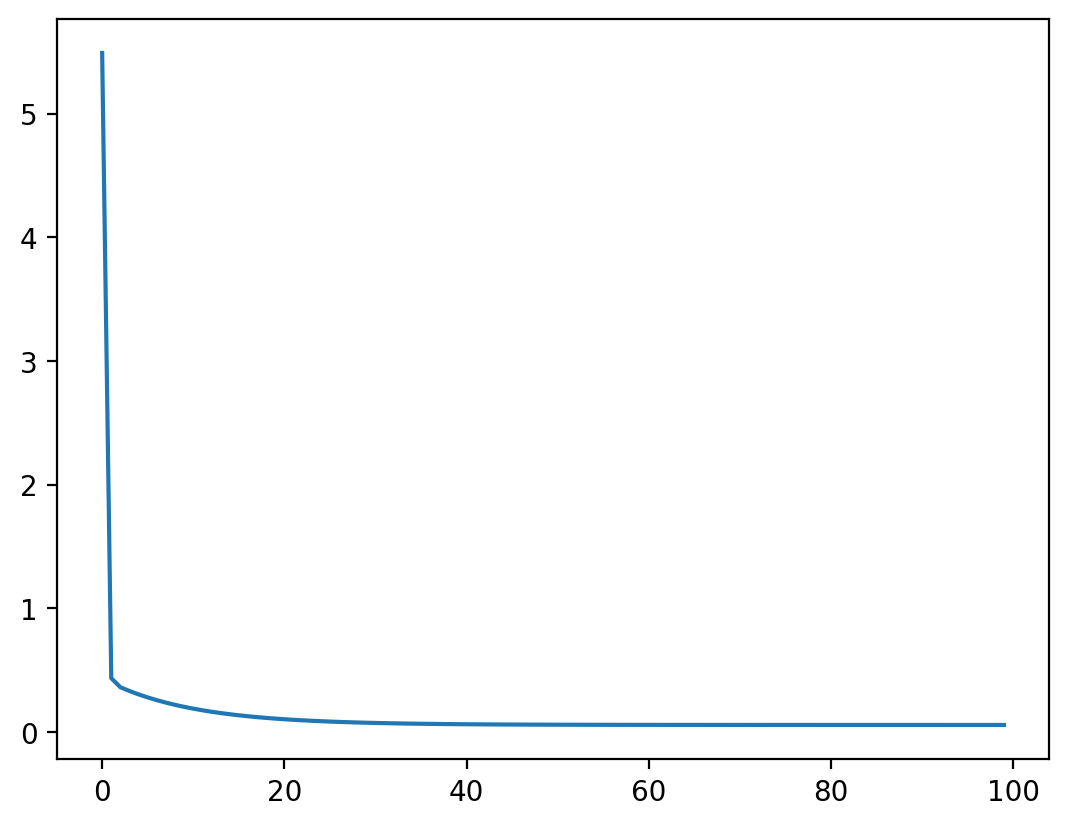

In [40]:
plt.plot(history)
history[-1]

In [ ]:
# FullBatch -> GD
# 특정 갯수 instance -> Extream case 로 1이었던 것 -> SGD

In [ ]:
# 이제 logistic 들어가자

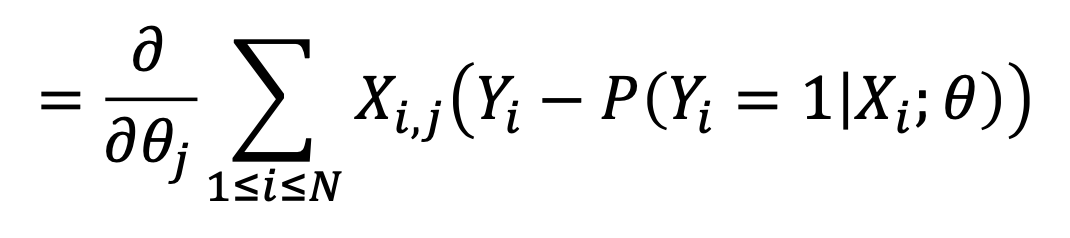

In [ ]:
# 위에 것이 목적함수

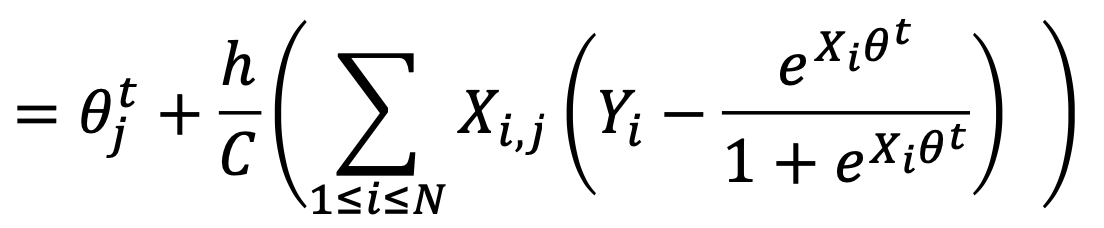

In [ ]:
# 위에가 로지스틱 함수 미분한 것

In [42]:
logistic = lambda x,w:1/(1+np.exp(-x.dot(w)))
dlogistic = lambda x,w:X.T.dot(1-logistic(x,w))

In [47]:
W = np.random.rand(2)
h = 1e-5
history = list()

for _ in range(200000):
    # Full-batch
    yhat = logistic(nX,W) # (d,)
    u = dlogistic(nX,W)
    u = u/np.linalg.norm(u)
    W += h*u
    
    if _% 100 ==0:
        history.append(np.mean(logistic(nX,W)))

0.9955042714749919

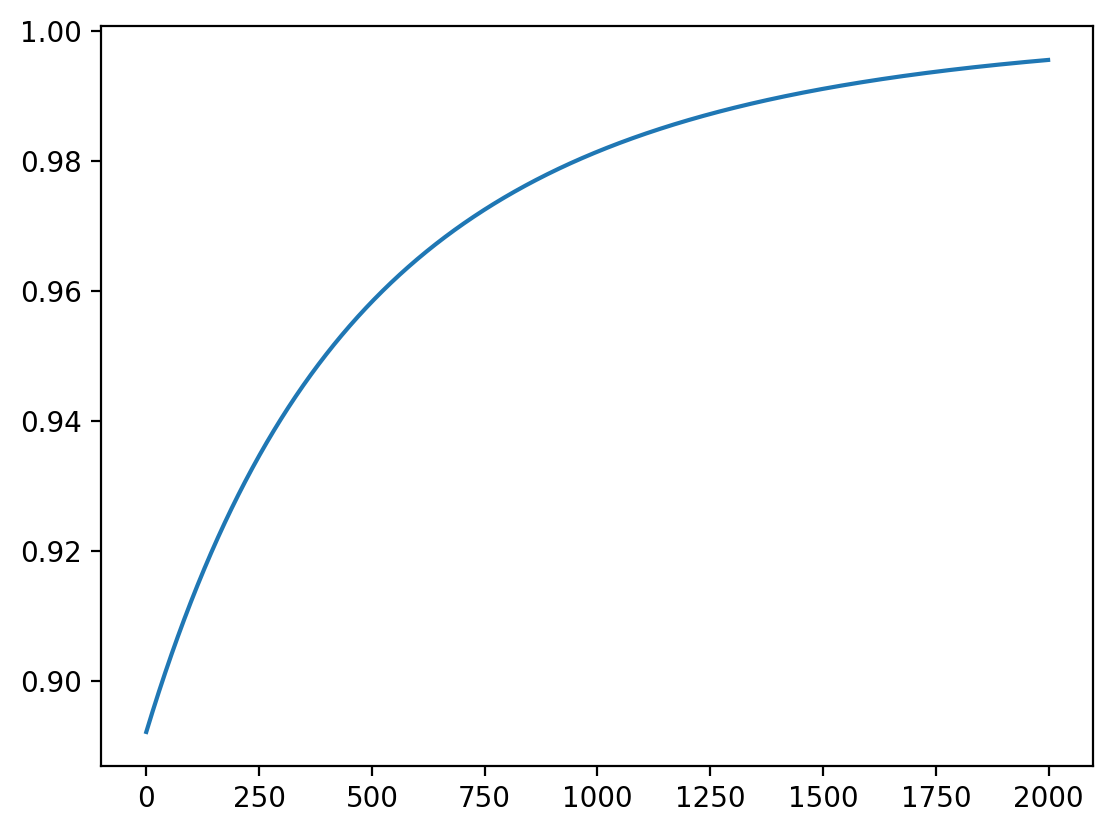

In [49]:
plt.plot(history)
history[-1]

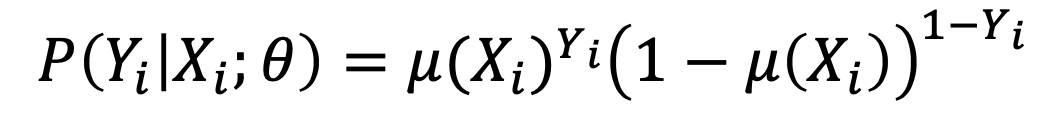

In [3]:
X = np.random.rand(100)*np.pi*2   # 학습 data
Y = np.zeros(len(X))
Y[np.sin(X) > 0] = 1
nX = np.c_[np.ones(len(X)), X]  # XW (X0=1)

In [63]:
logistic = lambda x,w:1/(1+np.exp(-x.dot(w)))
dlogistic = lambda x,w,y:x.T.dot(y-logistic(x,w))

In [64]:
BCE = lambda y,y_hat:y_hat**y*(1-y_hat)**(1-y)
# -> Loss(NegativeLogLikelihood) = NLL  => 이것은 BCE 로부터 나옴. chain rule 하면서 확인하면 됨.

In [75]:
# u, h 수정하면서 모양 보기
W = np.random.rand(2)
h = 1e-5
history = list()

for _ in range(200000):
    # Full-batch
    yhat = logistic(nX,W) # (d,)
    u = dlogistic(nX,W,Y)
    u = u#/np.linalg.norm(u)
    W += h*u
    
    if _% 100 ==0:
#        history.append(np.mean(logistic(nX,W)))
        history.append(np.mean(BCE(Y,logistic(nX,W))))

0.9198892951440196

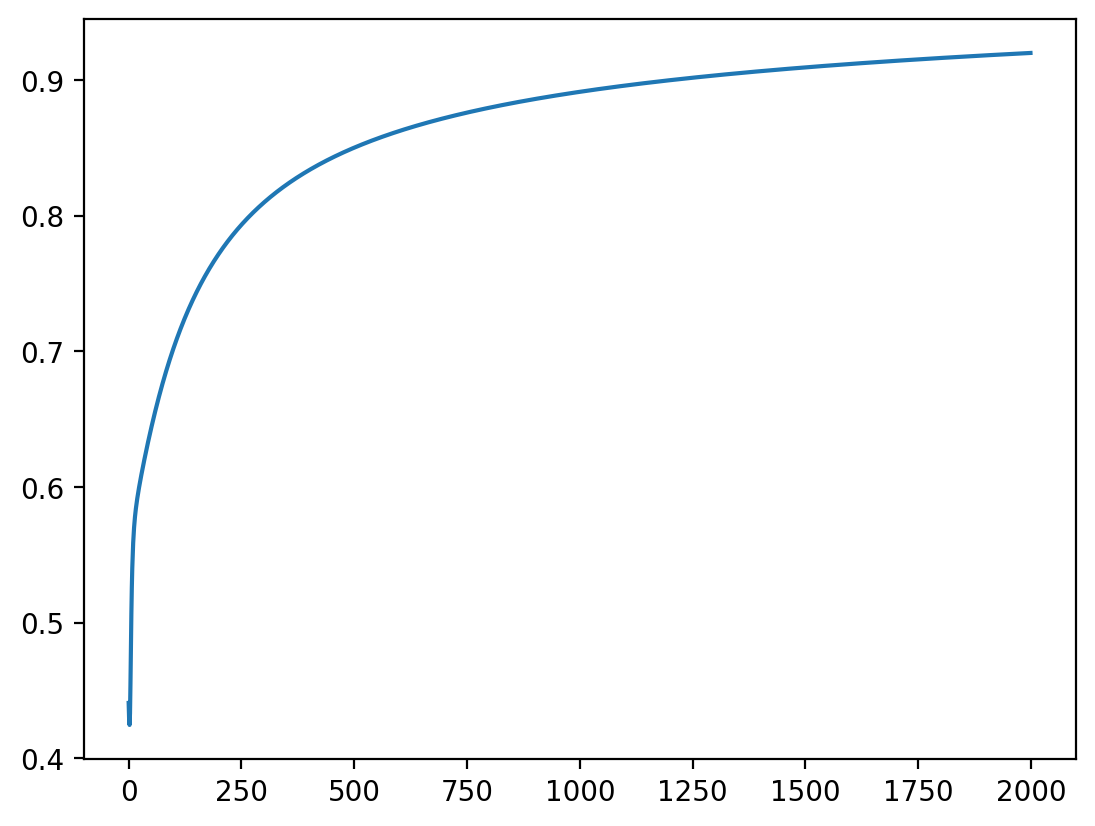

In [76]:
plt.plot(history)
history[-1]

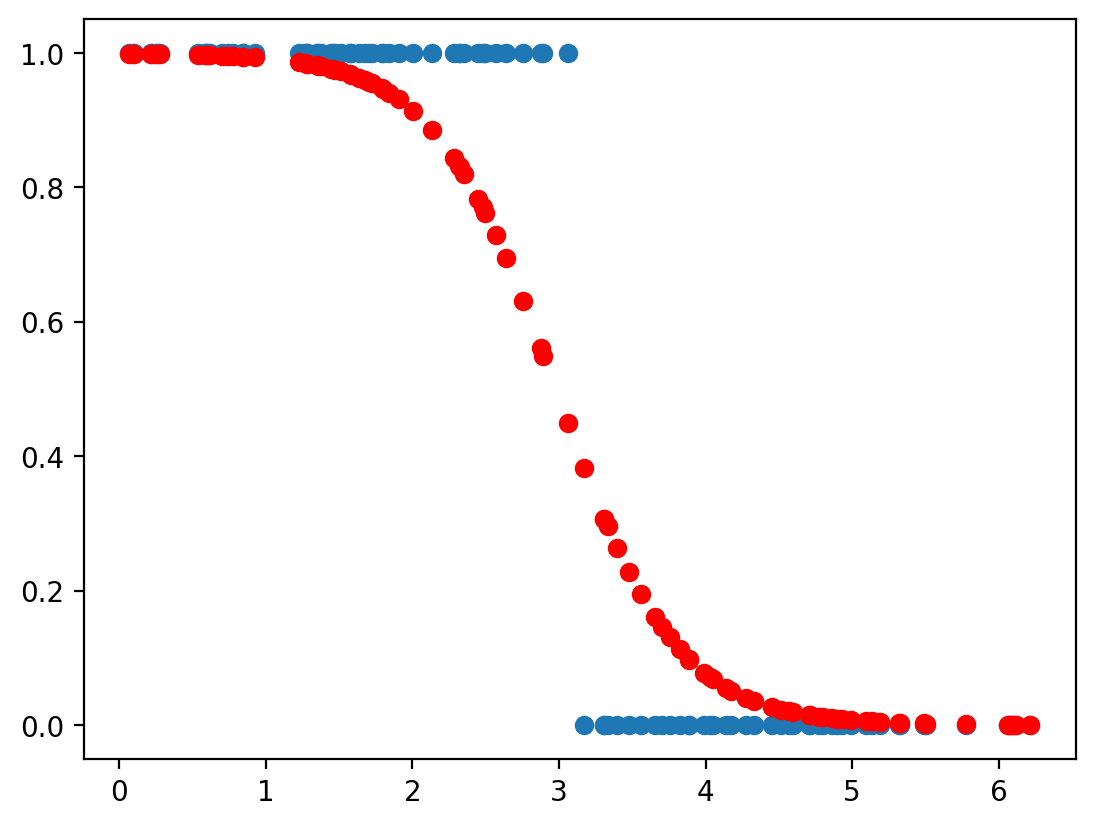

In [77]:
plt.scatter(X, Y)
plt.scatter(X,logistic(nX,W), c='r')